In [48]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

In [14]:
pd.set_option("display.max_columns" , None)

In [15]:
households = pd.read_csv("../data/raw/households.csv")
edges = pd.read_csv("../data/raw/edges.csv")

In [16]:
with open("../data/raw/flood_scenario.json") as f:
    flood = json.load(f)

In [17]:
print(f"Households shape : {households.shape}")
print(f"Edges shape : {edges.shape}")

Households shape : (1000, 14)
Edges shape : (2495, 6)


## Preprocessing For Household Dataset

In [19]:
households.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1000 non-null   object 
 1   num_members          1000 non-null   int64  
 2   head_gender          1000 non-null   object 
 3   vulnerability_score  1000 non-null   float64
 4   resources_food       1000 non-null   int64  
 5   resources_water      1000 non-null   int64  
 6   resources_shelter    1000 non-null   int64  
 7   resources_medicine   1000 non-null   int64  
 8   marginalized_flag    1000 non-null   int64  
 9   elderly_count        1000 non-null   int64  
 10  children_count       1000 non-null   int64  
 11  disability_flag      1000 non-null   int64  
 12  distance_to_center   1000 non-null   float64
 13  past_aid_received    1000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 109.5+ KB


In [20]:
households.describe()

,num_members,vulnerability_score,resources_food,resources_water,resources_shelter,resources_medicine,marginalized_flag,elderly_count,children_count,disability_flag,distance_to_center,past_aid_received
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.004000,0.602940,3.484000,3.533000,1.518000,1.0340,0.295000,1.016000,1.441000,0.138000,2.691730,0.975000
std,1.433192,0.230753,1.691924,1.719263,0.499926,0.8219,0.456271,0.805228,1.118826,0.345073,1.280958,0.809339
min,3.000000,0.200000,1.000000,1.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,4.000000,0.400000,2.000000,2.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.587500,0.000000
50%,5.000000,0.610000,4.000000,3.000000,2.000000,1.0000,0.000000,1.000000,1.000000,0.000000,2.625000,1.000000
75%,6.000000,0.800000,5.000000,5.000000,2.000000,2.0000,1.000000,2.000000,2.000000,0.000000,3.760000,2.000000
max,7.000000,1.000000,6.000000,6.000000,2.000000,2.0000,1.000000,2.000000,3.000000,1.000000,4.980000,2.000000


In [21]:
households.isna().sum()

id                     0
num_members            0
head_gender            0
vulnerability_score    0
resources_food         0
resources_water        0
resources_shelter      0
resources_medicine     0
marginalized_flag      0
elderly_count          0
children_count         0
disability_flag        0
distance_to_center     0
past_aid_received      0
dtype: int64

In [22]:
edges.isna().sum()

from_id               0
to_id                 0
tie_strength          0
physical_proximity    0
kinship_relation      0
sharing_history       0
dtype: int64

In [26]:
affected_ids = set([h["id"] for h in flood["affected_households"]])

In [29]:
households["affected"] = households["id"].apply(
    lambda x: 1 if x in affected_ids else 0
)

In [30]:
households.head()

,id,num_members,head_gender,vulnerability_score,resources_food,resources_water,resources_shelter,resources_medicine,marginalized_flag,elderly_count,children_count,disability_flag,distance_to_center,past_aid_received,affected
0,H1,6,Female,0.33,6,6,1,2,0,1,2,1,4.69,1,0
1,H2,7,Female,0.28,3,1,2,0,0,0,2,0,1.75,0,0
2,H3,5,Female,0.71,4,2,2,0,0,1,1,0,4.78,1,1
3,H4,7,Female,0.77,4,5,1,2,1,1,3,0,0.78,0,0
4,H5,7,Female,0.23,1,6,1,1,1,1,1,0,3.21,2,0


In [32]:
severity_dict = {h["id"]: h["severity"] for h in flood["affected_households"]}
households["severity"] = households["id"].apply(
    lambda x: severity_dict.get(x, 0)
)

In [33]:
households.sample(3)

,id,num_members,head_gender,vulnerability_score,resources_food,resources_water,resources_shelter,resources_medicine,marginalized_flag,elderly_count,children_count,disability_flag,distance_to_center,past_aid_received,affected,severity
447,H448,3,Male,0.21,6,2,2,0,1,1,3,0,3.67,2,0,0.00
910,H911,6,Male,0.42,4,2,2,2,1,2,2,0,3.08,1,1,0.86
795,H796,4,Female,0.97,1,4,2,0,1,0,2,0,0.74,1,0,0.00


In [38]:
scale_cols = [
    'elderly_count',        
    'children_count',       
    'disability_flag',      
    'vulnerability_score',  
    'resources_food',       
    'resources_water',      
    'resources_shelter',    
    'resources_medicine'  
]


In [39]:
scaler = MinMaxScaler()

In [40]:
households[scale_cols] = scaler.fit_transform(households[scale_cols])

In [46]:
households["need_score"] = (
    households["elderly_count"] * 2.0 +
    households["children_count"] * 1.5 +
    households["disability_flag"] * 3.0 +
    households["resources_shelter"] * 1.5 +   # more weight if they lack shelter
    (1 - households["vulnerability_score"]) * 2.0 +  # higher vulnerability → higher need
    households["severity"] * 2.5
)

In [47]:
households.sample(2)

,id,num_members,head_gender,vulnerability_score,resources_food,resources_water,resources_shelter,resources_medicine,marginalized_flag,elderly_count,children_count,disability_flag,distance_to_center,past_aid_received,affected,severity,need_score
182,H183,3,Male,0.8000,0.6,0.0,0.0,1.0,0,0.5,0.666667,0.0,4.00,2,0,0.0,2.400
617,H618,4,Male,0.3625,0.2,0.2,1.0,0.0,0,0.0,0.333333,1.0,2.94,0,0,0.0,6.275


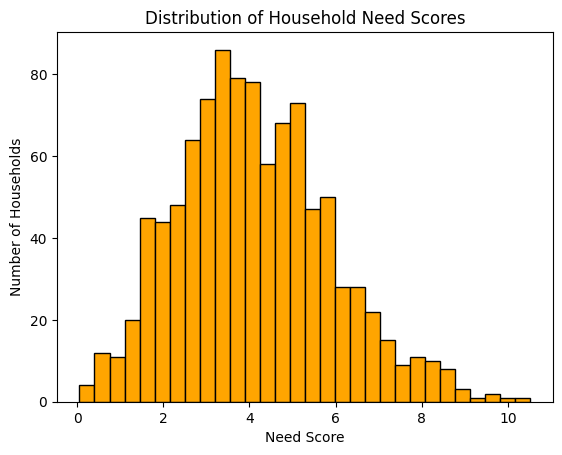

In [49]:
plt.hist(households["need_score"], bins=30, color="orange", edgecolor="black")
plt.title("Distribution of Household Need Scores")
plt.xlabel("Need Score")
plt.ylabel("Number of Households")
plt.show()

In [62]:
households.to_csv("../data/processed/households_processed.csv" , index = False)

## Preprocessing For Edges Dataset

In [51]:
print("Edges shape:", edges.shape)
edges.head()

Edges shape: (2495, 6)


,from_id,to_id,tie_strength,physical_proximity,kinship_relation,sharing_history
0,H1,H708,0.85,0.62,other,2
1,H2,H566,0.94,1.79,cousin,1
2,H2,H177,0.93,0.61,other,1
3,H2,H802,0.87,0.41,other,0
4,H3,H183,0.82,1.11,sibling,1


In [54]:
print("Total edges:", edges.shape[0])

unique_nodes = pd.unique(edges[['from_id', 'to_id']].values.ravel())
print("Unique households in edges:", len(unique_nodes))

self_loops = edges[edges['from_id'] == edges['to_id']]
print("Self-loops count:", self_loops.shape[0])

duplicate_edges = edges.duplicated(subset=['from_id','to_id'])
print("Duplicate edges count:", duplicate_edges.sum())


Total edges: 2495
Unique households in edges: 1000
Self-loops count: 0
Duplicate edges count: 0


In [56]:
scaler = MinMaxScaler()

In [57]:
edges[['tie_strength', 'physical_proximity']] = scaler.fit_transform(
    edges[['tie_strength', 'physical_proximity']]
)

In [58]:
edges.head()

,from_id,to_id,tie_strength,physical_proximity,kinship_relation,sharing_history
0,H1,H708,0.750000,0.216667,other,2
1,H2,H566,0.900000,0.704167,cousin,1
2,H2,H177,0.883333,0.212500,other,1
3,H2,H802,0.783333,0.129167,other,0
4,H3,H183,0.700000,0.420833,sibling,1


In [59]:
edges['kinship_encoded'] = edges['kinship_relation'].map({
    'sibling': 3,
    'cousin': 2,
    'other': 1
})

In [60]:
edges.sample()

,from_id,to_id,tie_strength,physical_proximity,kinship_relation,sharing_history,kinship_encoded
2080,H834,H935,0.266667,0.575,sibling,2,3.0


In [61]:
edges.to_csv("../data/processed/edges_processed.csv" , index = False)